In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train = pd.read_csv('train.csv')
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
test = pd.read_csv('test.csv')
print(test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Comments:

* Age is missing

In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Comments:
* Age and a single value of Fare are missing.

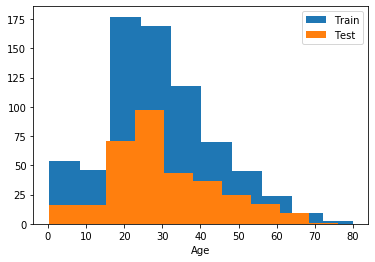

In [6]:
plt.figure()
plt.hist(train['Age'].dropna(), label = 'Train')
plt.hist(test['Age'].dropna(), label = 'Test')
plt.xlabel("Age")
plt.legend()
plt.show()

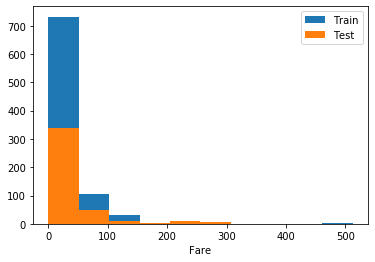

In [7]:
plt.figure()
plt.hist(train['Fare'].dropna(), label = 'Train')
plt.hist(test['Fare'].dropna(), label = 'Test')
plt.xlabel("Fare")
plt.legend()
plt.show()

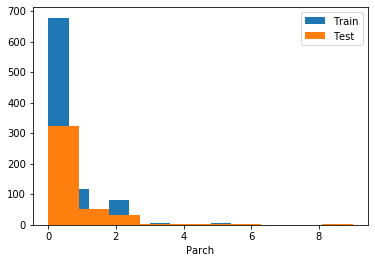

In [8]:
plt.figure()
plt.hist(train['Parch'].dropna(), label = 'Train')
plt.hist(test['Parch'].dropna(), label = 'Test')
plt.xlabel("Parch")
plt.legend()
plt.show()

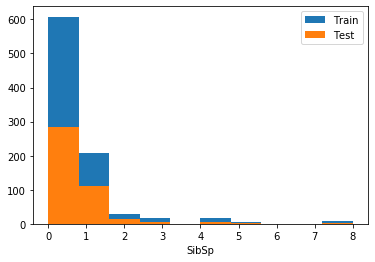

In [9]:
plt.figure()
plt.hist(train['SibSp'].dropna(), label = 'Train')
plt.hist(test['SibSp'].dropna(), label = 'Test')
plt.xlabel("SibSp")
plt.legend()
plt.show()

In [10]:
train.groupby('Sex').agg({'Survived': 'mean'})

,Survived
Sex,
female,0.742038
male,0.188908


Comments:
* Females had a much higher rate of survival than males.

In [11]:
train['AgeBin'] = train['Age'].apply(lambda x: 0 if x <= 6 else 1)
train.groupby('AgeBin').agg({'Survived': 'mean'})

,Survived
AgeBin,
0,0.702128
1,0.366114


Comments:
* Passengers under age 7 had a much higher surival rate than others.

In [12]:
train.groupby('Pclass').agg({'Survived': 'mean'})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Comments:
* The passengers in higher class had a noticeably higher surival rate than those in lower classes.

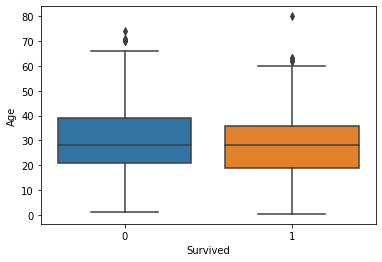

In [13]:
plt.figure()
sb.boxplot(x = "Survived", y = "Age", data = train)
plt.show()

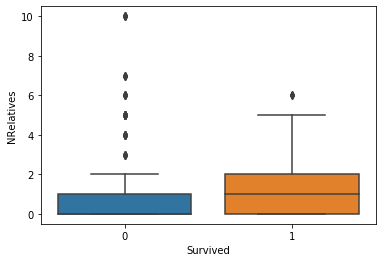

In [14]:
train['NRelatives'] = train['SibSp'] + train["Parch"]
plt.figure()
sb.boxplot(x = "Survived", y = "NRelatives", data = train)
plt.show()

In [15]:
train['HasRelatives'] = train['NRelatives'].apply(lambda x: 1 if x > 0  else 0)
train.groupby('HasRelatives').agg({'Survived': 'mean'})

,Survived
HasRelatives,
0,0.303538
1,0.505650


Comments:
* Passengers who have a relative have a higher surival rate than those who traveled alone.

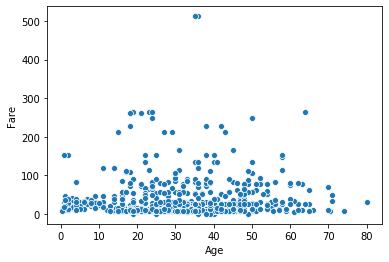

In [16]:
plt.figure()
sb.scatterplot(x = "Age", y = "Fare", data = train)
plt.show()

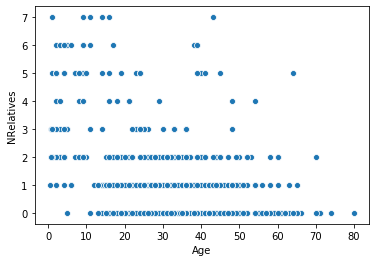

In [17]:
plt.figure()
sb.scatterplot(x = "Age", y = "NRelatives", data = train)
plt.show()

In [18]:
train.groupby('Pclass').agg({'Age': 'median'})

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [19]:
train.groupby('Embarked').agg({'Survived': 'mean'})

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [20]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,NRelatives,HasRelatives
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,0,0


In [21]:
train[train['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,NRelatives,HasRelatives
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,0,0


In [22]:
train[train['Fare'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,NRelatives,HasRelatives
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,0,0


In [23]:
train.groupby(['Embarked']).agg({'Fare': 'max'})

,Fare
Embarked,
C,512.3292
Q,90.0000
S,263.0000


## We will create a new train and test dataset that is ready for learning.

In [24]:
def impute_age(Pclass, age):
    
    if np.isnan(age):
        
        if Pclass == 1:

            return 37

        elif Pclass == 2:

            return 29

        elif Pclass == 3:

            return 24
        
    else:
        
        return age

In [25]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
def modify_data(data):
    
    AgeImputed = []
    data = data.copy()
    
    for i in range(0, data.shape[0]):
    
        AgeImputed.append(impute_age(data['Pclass'].iloc[i], data['Age'].iloc[i]))
    
    data['Age'] = AgeImputed
    data['AgeBin'] = data['Age'].apply(lambda x: 0 if x <= 6 else 1)
    data['NRelatives'] = data['SibSp'] + data["Parch"]
    data['HasRelatives'] = data['NRelatives'].apply(lambda x: 1 if x > 0  else 0)
    data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    data['FareOverHundred'] = data['Fare']/100 # Need to scale the values.
    
    # Construct dummy variables out of categorical variables.
    embarked = pd.get_dummies(data['Embarked'], prefix = 'Embarked', drop_first = True)
    pclass = pd.get_dummies(data['Pclass'], prefix = 'Pclass', drop_first = True)
    data['Embarked_Q'] = embarked['Embarked_Q']
    data['Embarked_S'] = embarked['Embarked_S']
    data['Pclass_2'] = pclass['Pclass_2']
    data['Pclass_3'] = pclass['Pclass_3'] 
    
    D = {'S': 1, 'C': 2, 'Q': 3}
    data['EmbarkedCat'] = data['Embarked'].map(D)
    data = data.drop(columns = ['Name', 'Ticket', 'Cabin'])
    
    return data

In [27]:
train2 = modify_data(train)
test2 = modify_data(test)

In [28]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBin,NRelatives,HasRelatives,FareOverHundred,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,EmbarkedCat
0,1,0,3,1,22.0,1,0,7.2500,S,1,1,1,0.072500,0,1,0,1,1.0
1,2,1,1,0,38.0,1,0,71.2833,C,1,1,1,0.712833,0,0,0,0,2.0
2,3,1,3,0,26.0,0,0,7.9250,S,1,0,0,0.079250,0,1,0,1,1.0
3,4,1,1,0,35.0,1,0,53.1000,S,1,1,1,0.531000,0,1,0,0,1.0
4,5,0,3,1,35.0,0,0,8.0500,S,1,0,0,0.080500,0,1,0,1,1.0


Check to see if there are any missing variables.

In [29]:
train2.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeBin,NRelatives,HasRelatives,FareOverHundred,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,EmbarkedCat
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,0.947250,0.904602,0.397306,0.322042,0.086420,0.722783,0.206510,0.551066,1.362205
std,257.353842,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,0.223659,1.613459,0.489615,0.496934,0.281141,0.447876,0.405028,0.497665,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.079104,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.144542,0.000000,1.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.310000,0.000000,1.000000,0.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000,1.000000,5.123292,1.000000,1.000000,1.000000,1.000000,3.000000


In [30]:
test2.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,AgeBin,NRelatives,HasRelatives,FareOverHundred,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,EmbarkedCat
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,29.321770,0.447368,0.392344,35.627188,0.964115,0.839713,0.394737,0.356272,0.110048,0.645933,0.222488,0.521531,1.464115
std,120.810458,0.841838,0.481622,12.904065,0.896760,0.981429,55.907576,0.186227,1.519072,0.489380,0.559076,0.313324,0.478803,0.416416,0.500135,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000,0.078958,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1100.500000,3.000000,1.000000,25.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.144542,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1204.750000,3.000000,1.000000,36.375000,1.000000,0.000000,31.500000,1.000000,1.000000,1.000000,0.315000,0.000000,1.000000,0.000000,1.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,10.000000,1.000000,5.123292,1.000000,1.000000,1.000000,1.000000,3.000000


Impute missing value for 'FareOverHundred'.

In [31]:
test2[test2['FareOverHundred'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBin,NRelatives,HasRelatives,FareOverHundred,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,EmbarkedCat
152,1044,3,1,60.5,0,0,NaN,S,1,0,0,NaN,0,1,0,1,1


In [32]:
train2.groupby(['Embarked']).agg({'FareOverHundred': 'median'})

,FareOverHundred
Embarked,
C,0.2970
Q,0.0775
S,0.1300


In [33]:
test2.at[152, 'FareOverHundred'] = 0.13

In [34]:
train2[train2['Embarked'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBin,NRelatives,HasRelatives,FareOverHundred,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,EmbarkedCat
61,62,1,1,0,38.0,0,0,80.0,NaN,1,0,0,0.8,0,0,0,0,NaN
829,830,1,1,0,62.0,0,0,80.0,NaN,1,0,0,0.8,0,0,0,0,NaN


In [35]:
train2.at[61, 'Embarked'] = 'Q'
train2.at[829, 'Embarked'] = 'Q'
train2.at[61, 'EmbarkedCat'] = 3
train2.at[829, 'EmbarkedCat'] = 3

In [36]:
sum(test2['FareOverHundred'].isna())

0

In [37]:
sum(test2['Embarked'].isna())

0

In [38]:
train2.to_csv('train2.csv', index = False)
test2.to_csv('test2.csv', index = False)

In [40]:
train2.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeBin,NRelatives,HasRelatives,FareOverHundred,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,EmbarkedCat
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,0.947250,0.904602,0.397306,0.322042,0.086420,0.722783,0.206510,0.551066,1.365881
std,257.353842,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,0.223659,1.613459,0.489615,0.496934,0.281141,0.447876,0.405028,0.497665,0.640157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.079104,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.144542,0.000000,1.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.310000,0.000000,1.000000,0.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000,1.000000,5.123292,1.000000,1.000000,1.000000,1.000000,3.000000


In [41]:
test2.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,AgeBin,NRelatives,HasRelatives,FareOverHundred,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,EmbarkedCat
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,29.321770,0.447368,0.392344,35.627188,0.964115,0.839713,0.394737,0.355731,0.110048,0.645933,0.222488,0.521531,1.464115
std,120.810458,0.841838,0.481622,12.904065,0.896760,0.981429,55.907576,0.186227,1.519072,0.489380,0.558515,0.313324,0.478803,0.416416,0.500135,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000,0.078958,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1100.500000,3.000000,1.000000,25.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.144542,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1204.750000,3.000000,1.000000,36.375000,1.000000,0.000000,31.500000,1.000000,1.000000,1.000000,0.314719,0.000000,1.000000,0.000000,1.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,10.000000,1.000000,5.123292,1.000000,1.000000,1.000000,1.000000,3.000000
